In [215]:
import numpy as np
import pandas as pd

In [216]:
data = pd.read_csv("./Data/housing.csv")

In [217]:
data = data.loc[:, ["median_income", "latitude", "longitude"]]
data['longitude'] = data['longitude'] * -1

In [218]:
data.isnull().sum()

median_income    0
latitude         0
longitude        0
dtype: int64

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_income  20640 non-null  float64
 1   latitude       20640 non-null  float64
 2   longitude      20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [220]:
data.describe()

,median_income,latitude,longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,114.310000
25%,2.563400,33.930000,118.010000
50%,3.534800,34.260000,118.490000
75%,4.743250,37.710000,121.800000
max,15.000100,41.950000,124.350000


#### No null data -> data is already clean

In [221]:
#dropping outlier row with standard deviation
factor = 3
upper_lim_median = (data['median_income'].mean()) + data['median_income'].std() * factor
lower_lim_median = (data['median_income'].mean()) - data['median_income'].std() * factor

In [222]:
data = data[(data['median_income'] < upper_lim_median) & (data['median_income'] > lower_lim_median)]

In [223]:
upper_lim_latitude = (data['latitude'].mean()) + data['latitude'].std() * factor
lower_lim_latitude = (data['latitude'].mean()) - data['latitude'].std() * factor
data = data[(data['latitude'] < upper_lim_latitude) & (data['latitude'] > lower_lim_latitude)]

In [224]:
upper_lim_latitude = (data['longitude'].mean()) + data['longitude'].std() * factor
lower_lim_latitude = (data['longitude'].mean()) - data['longitude'].std() * factor
data = data[(data['longitude'] < upper_lim_latitude) & (data['longitude'] > lower_lim_latitude)]

In [225]:
data

,median_income,latitude,longitude
0,8.3252,37.88,122.23
1,8.3014,37.86,122.22
2,7.2574,37.85,122.24
3,5.6431,37.85,122.25
4,3.8462,37.85,122.25
...,...,...,...
20635,1.5603,39.48,121.09
20636,2.5568,39.49,121.21
20637,1.7000,39.43,121.22
20638,1.8672,39.43,121.32


#### Quartile

In [227]:
data = pd.read_csv("./Data/housing.csv")
data = data.loc[:, ["median_income", "latitude", "longitude"]]
data['longitude'] = data['longitude'] * -1

In [228]:
upper_lim = data['median_income'].quantile(.95)
lower_lim = data['median_income'].quantile(.05)

data = data[(data['median_income'] < upper_lim) & (data['median_income'] > lower_lim)]

#### Log Transform

In [229]:
data.head(5)

,median_income,latitude,longitude
2,7.2574,37.85,122.24
3,5.6431,37.85,122.25
4,3.8462,37.85,122.25
5,4.0368,37.85,122.25
6,3.6591,37.84,122.25


In [230]:
data["Log+1"] = (data['median_income'] + 1).transform(np.log)

In [231]:
data.head(5)

,median_income,latitude,longitude,Log+1
2,7.2574,37.85,122.24,2.111110
3,5.6431,37.85,122.25,1.893579
4,3.8462,37.85,122.25,1.578195
5,4.0368,37.85,122.25,1.616771
6,3.6591,37.84,122.25,1.538822


### One hot encoding

In [232]:
# make data into pivot table
data.pivot_table(index = 'latitude' , columns = 'longitude' , values = 'median_income' , aggfunc = np.sum ,fill_value = 0)

longitude,114.47,114.49,114.56,114.57,114.58,114.59,114.60,114.61,114.64,114.65,...,124.18,124.19,124.21,124.22,124.23,124.25,124.26,124.27,124.30,124.35
latitude,,,,,,,,,,,,,,,,,,,,,
32.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
32.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
32.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
32.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
32.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0313,0.0
41.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0
41.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0


### Grouping

In [233]:
grouped = data.groupby('latitude')

In [234]:
grouped.sum().add_suffix('_sum')

,median_income_sum,longitude_sum,Log+1_sum
latitude,,,
32.55,5.5931,234.13,2.569870
32.56,27.6430,1170.62,12.967701
32.57,59.3051,1990.40,25.134304
32.58,88.0291,3044.35,37.920261
32.59,30.1549,1287.85,14.281202
...,...,...,...
41.84,3.0313,124.30,1.394089
41.86,6.6962,367.52,3.495993
41.88,3.1300,123.83,1.418277


In [235]:
"""
sums = grouped[data['longitude']].sum().add_suffix('_sum')
avgs = grouped[data['logitude']].mean().add_suffix('_avg')

new_df = pd.concat([sums , avgs] , axis = 1) 
"""

"\nsums = grouped[data['longitude']].sum().add_suffix('_sum')\navgs = grouped[data['logitude']].mean().add_suffix('_avg')\n\nnew_df = pd.concat([sums , avgs] , axis = 1) \n"

## Normalization

In [236]:
data.head(5)

,median_income,latitude,longitude,Log+1
2,7.2574,37.85,122.24,2.111110
3,5.6431,37.85,122.25,1.893579
4,3.8462,37.85,122.25,1.578195
5,4.0368,37.85,122.25,1.616771
6,3.6591,37.84,122.25,1.538822


In [237]:
data['normalized'] = (data['median_income'] - data['median_income'].min()) / (data['median_income'].max() - data['median_income'].min())

In [238]:
data.head(10)

,median_income,latitude,longitude,Log+1,normalized
2,7.2574,37.85,122.24,2.111110,0.992473
3,5.6431,37.85,122.25,1.893579,0.709248
4,3.8462,37.85,122.25,1.578195,0.393986
5,4.0368,37.85,122.25,1.616771,0.427426
6,3.6591,37.84,122.25,1.538822,0.361159
7,3.1200,37.84,122.25,1.415853,0.266575
8,2.0804,37.84,122.26,1.125059,0.084180
9,3.6912,37.84,122.25,1.545688,0.366791
10,3.2031,37.85,122.26,1.435822,0.281155
11,3.2705,37.85,122.26,1.451731,0.292980


In [239]:
data["median_income"].max()

7.3003

In [240]:
data["standardized"] = (data['median_income'] - data['median_income'].mean()) / data['median_income'].std()

In [241]:
data.head(5)

,median_income,latitude,longitude,Log+1,normalized,standardized
2,7.2574,37.85,122.24,2.111110,0.992473,2.673572
3,5.6431,37.85,122.25,1.893579,0.709248,1.455634
4,3.8462,37.85,122.25,1.578195,0.393986,0.099931
5,4.0368,37.85,122.25,1.616771,0.427426,0.243732
6,3.6591,37.84,122.25,1.538822,0.361159,-0.041230


### Binning Method

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
data = pd.read_csv("./Data/housing.csv")
data = data.loc[:, ["median_income", "latitude", "longitude"]]
data['longitude'] = data['longitude'] * -1

In [255]:
factor = 3
upper_lim_median = (data['median_income'].mean()) + data['median_income'].std() * factor
lower_lim_median = (data['median_income'].mean()) - data['median_income'].std() * factor
data = data[(data['median_income'] < upper_lim_median) & (data['median_income'] > lower_lim_median)]

<Figure size 720x576 with 0 Axes>

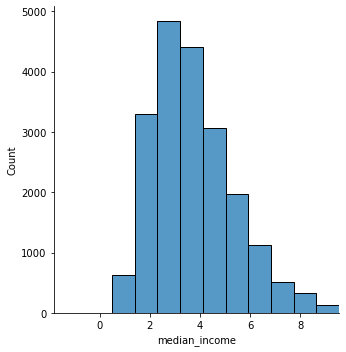

In [257]:
plt.figure(figsize = (10,8))
sns.displot(data['median_income'] , kde = False , bins = 10)
plt.xlim(lower_lim_median , upper_lim_median)
plt.show()

In [266]:
Binning = pd.qcut(data['median_income'] , 3 , labels= ['Low' , 'Average' , 'High'])

In [267]:
data['Binning'] = Binning

In [268]:
data.head(5)

,median_income,latitude,longitude,Binning
0,8.3252,37.88,122.23,High
1,8.3014,37.86,122.22,High
2,7.2574,37.85,122.24,High
3,5.6431,37.85,122.25,High
4,3.8462,37.85,122.25,Average


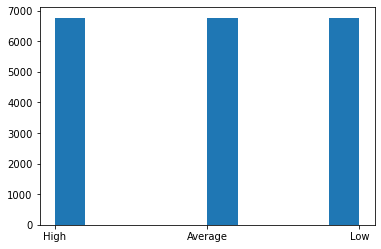

In [273]:
plt.hist(data['Binning'])
plt.show()

In [274]:
data['Binning'].value_counts()

Low        6765
Average    6765
High       6765
Name: Binning, dtype: int64

<AxesSubplot:xlabel='Binning', ylabel='median_income'>

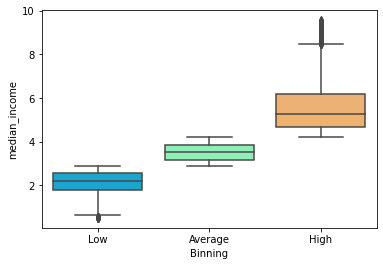

In [275]:
sns.boxplot(x="Binning", y="median_income", data=data,palette='rainbow')